## DATA DRIVEN OPTIMIZATION

In [1]:
# libraries
import pandas as pd 
from datetime import date, datetime
import warnings
warnings.filterwarnings("ignore")

# Question 1
Download the current Covid-19 dataset WHO-COVID-19-global-data.csv from the link:
https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths
    

In [2]:
# read the dataset
df = pd.read_csv('WHO-COVID-19-global-data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
162814,2021-11-15,ZW,Zimbabwe,AFRO,10,133438,1,4697
162815,2021-11-16,ZW,Zimbabwe,AFRO,33,133471,0,4697
162816,2021-11-17,ZW,Zimbabwe,AFRO,34,133505,1,4698
162817,2021-11-18,ZW,Zimbabwe,AFRO,52,133557,1,4699


### (a) Use the available data for 2021 for Angola, to predict the number of New_cases for November 20, 2021 and November 21, 2021 for Angola.


In [3]:
# filter Angola
Angola = df[df.Country=='Angola']
Angola

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
3435,2020-01-03,AO,Angola,AFRO,0,0,0,0
3436,2020-01-04,AO,Angola,AFRO,0,0,0,0
3437,2020-01-05,AO,Angola,AFRO,0,0,0,0
3438,2020-01-06,AO,Angola,AFRO,0,0,0,0
3439,2020-01-07,AO,Angola,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
4117,2021-11-15,AO,Angola,AFRO,14,64913,0,1727
4118,2021-11-16,AO,Angola,AFRO,0,64913,0,1727
4119,2021-11-17,AO,Angola,AFRO,27,64940,2,1729
4120,2021-11-18,AO,Angola,AFRO,28,64968,0,1729


In [4]:
# check missing values
Angola.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [5]:
Angola['Date']=pd.to_datetime(Angola['Date_reported'])
Angola['Year']=pd.DatetimeIndex(Angola['Date_reported']).year

In [6]:
Angoladf = Angola[Angola.Year==2021]
Angoladf

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Year
3799,2021-01-01,AO,Angola,AFRO,182,17553,6,405,2021-01-01,2021
3800,2021-01-02,AO,Angola,AFRO,0,17553,0,405,2021-01-02,2021
3801,2021-01-03,AO,Angola,AFRO,55,17608,2,407,2021-01-03,2021
3802,2021-01-04,AO,Angola,AFRO,34,17642,1,408,2021-01-04,2021
3803,2021-01-05,AO,Angola,AFRO,42,17684,0,408,2021-01-05,2021
...,...,...,...,...,...,...,...,...,...,...
4117,2021-11-15,AO,Angola,AFRO,14,64913,0,1727,2021-11-15,2021
4118,2021-11-16,AO,Angola,AFRO,0,64913,0,1727,2021-11-16,2021
4119,2021-11-17,AO,Angola,AFRO,27,64940,2,1729,2021-11-17,2021
4120,2021-11-18,AO,Angola,AFRO,28,64968,0,1729,2021-11-18,2021


In [7]:
# Lets use DOY (Day of Year) for above
# import datetime class from datetime module

from datetime import date
from datetime import datetime

DOY=[]
for my_date in Angoladf['Date']:
    date_val = date(my_date.year, my_date.month, my_date.day)
    day_of_year = date_val.strftime('%j')
    DOY.append(int(day_of_year))
Angoladf['DOY']=DOY
Angoladf

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Year,DOY
3799,2021-01-01,AO,Angola,AFRO,182,17553,6,405,2021-01-01,2021,1
3800,2021-01-02,AO,Angola,AFRO,0,17553,0,405,2021-01-02,2021,2
3801,2021-01-03,AO,Angola,AFRO,55,17608,2,407,2021-01-03,2021,3
3802,2021-01-04,AO,Angola,AFRO,34,17642,1,408,2021-01-04,2021,4
3803,2021-01-05,AO,Angola,AFRO,42,17684,0,408,2021-01-05,2021,5
...,...,...,...,...,...,...,...,...,...,...,...
4117,2021-11-15,AO,Angola,AFRO,14,64913,0,1727,2021-11-15,2021,319
4118,2021-11-16,AO,Angola,AFRO,0,64913,0,1727,2021-11-16,2021,320
4119,2021-11-17,AO,Angola,AFRO,27,64940,2,1729,2021-11-17,2021,321
4120,2021-11-18,AO,Angola,AFRO,28,64968,0,1729,2021-11-18,2021,322


# Dataset 

In [8]:
# The filtered Dataset for training.
Angoladf

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Year,DOY
3799,2021-01-01,AO,Angola,AFRO,182,17553,6,405,2021-01-01,2021,1
3800,2021-01-02,AO,Angola,AFRO,0,17553,0,405,2021-01-02,2021,2
3801,2021-01-03,AO,Angola,AFRO,55,17608,2,407,2021-01-03,2021,3
3802,2021-01-04,AO,Angola,AFRO,34,17642,1,408,2021-01-04,2021,4
3803,2021-01-05,AO,Angola,AFRO,42,17684,0,408,2021-01-05,2021,5
...,...,...,...,...,...,...,...,...,...,...,...
4117,2021-11-15,AO,Angola,AFRO,14,64913,0,1727,2021-11-15,2021,319
4118,2021-11-16,AO,Angola,AFRO,0,64913,0,1727,2021-11-16,2021,320
4119,2021-11-17,AO,Angola,AFRO,27,64940,2,1729,2021-11-17,2021,321
4120,2021-11-18,AO,Angola,AFRO,28,64968,0,1729,2021-11-18,2021,322


In [9]:
# libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Splitting the dataset into independent and dependent variables (x= features and y is the target).

x = Angoladf[['DOY']].values
y = Angoladf[['New_cases']].values
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

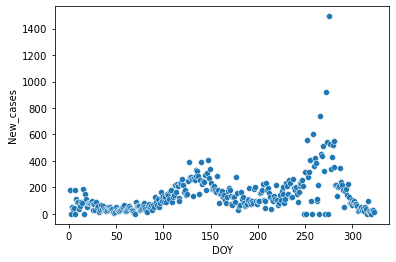

In [11]:
# lets see how scatter plot of the two looks
sns.scatterplot(data=Angoladf,x='DOY',y='New_cases')
plt.show()

In [12]:
# Linear regression (which model have you used? it's okay! ) model training
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(y_test,y_pred))

9824.758954808094
70.81496276130085


##### Linear does seem to be a good model for this data.

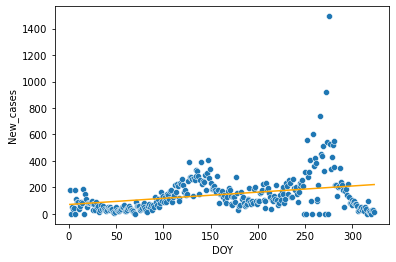

In [13]:
# lets visualize the model with data.
t = Angoladf[['DOY']].values
y_preda=model.predict(x)
sns.scatterplot(data=Angoladf,x='DOY',y='New_cases')
plt.plot(t,y_preda,'orange')
plt.show()

In [14]:
# predict New cases for November 20, 2021 and November 21, 2021, for our case: these dates correspond to DOY=[324, 325]
pred20 = model.predict([[324],[325]])
print(pred20)

[[222.22309925]
 [222.68910008]]


### (b) Considering the available data for 2021, what is the predicted average number of New_deaths for the whole of Africa for November 20, 2021 and November 21, 2021?

#### Hint: Use sklearn, pandas, numpy

In [15]:
# lets filter Africa from dataset
df = df[df.WHO_region=='AFRO']
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1374,2020-01-03,DZ,Algeria,AFRO,0,0,0,0
1375,2020-01-04,DZ,Algeria,AFRO,0,0,0,0
1376,2020-01-05,DZ,Algeria,AFRO,0,0,0,0
1377,2020-01-06,DZ,Algeria,AFRO,0,0,0,0
1378,2020-01-07,DZ,Algeria,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
162814,2021-11-15,ZW,Zimbabwe,AFRO,10,133438,1,4697
162815,2021-11-16,ZW,Zimbabwe,AFRO,33,133471,0,4697
162816,2021-11-17,ZW,Zimbabwe,AFRO,34,133505,1,4698
162817,2021-11-18,ZW,Zimbabwe,AFRO,52,133557,1,4699


In [16]:
# create Year column and DOY, and filter 2021
df['Date']=pd.to_datetime(df['Date_reported'])
df['Year']=pd.DatetimeIndex(df['Date_reported']).year


In [17]:

Day=[]
for my_date in df['Date']:
    date_val = date(my_date.year, my_date.month, my_date.day)
    day_of_year = date_val.strftime('%j')
    Day.append(int(day_of_year))
df['DOY']=Day

In [18]:
df2021 = df[df.Year == 2021]
df2021

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Year,DOY
1738,2021-01-01,DZ,Algeria,AFRO,299,99610,5,2756,2021-01-01,2021,1
1739,2021-01-02,DZ,Algeria,AFRO,0,99610,0,2756,2021-01-02,2021,2
1740,2021-01-03,DZ,Algeria,AFRO,549,100159,13,2769,2021-01-03,2021,3
1741,2021-01-04,DZ,Algeria,AFRO,0,100159,0,2769,2021-01-04,2021,4
1742,2021-01-05,DZ,Algeria,AFRO,486,100645,8,2777,2021-01-05,2021,5
...,...,...,...,...,...,...,...,...,...,...,...
162814,2021-11-15,ZW,Zimbabwe,AFRO,10,133438,1,4697,2021-11-15,2021,319
162815,2021-11-16,ZW,Zimbabwe,AFRO,33,133471,0,4697,2021-11-16,2021,320
162816,2021-11-17,ZW,Zimbabwe,AFRO,34,133505,1,4698,2021-11-17,2021,321
162817,2021-11-18,ZW,Zimbabwe,AFRO,52,133557,1,4699,2021-11-18,2021,322


In [19]:
# lets compute daily average New_death for Africa 
df2 = df2021.groupby(['Date_reported']).agg({'New_deaths': 'mean', 'DOY': 'mean'}, as_index = True)
df2

,New_deaths,DOY
Date_reported,,
2021-01-01,10.80,1
2021-01-02,0.00,2
2021-01-03,17.90,3
2021-01-04,8.92,4
2021-01-05,9.92,5
...,...,...
2021-11-15,0.90,319
2021-11-16,1.18,320
2021-11-17,1.82,321


In [20]:
# Splitting the dataset into independent and dependent variables (x= features and y is the target).

x = df2[['DOY']].values
y = df2[['New_deaths']].values
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

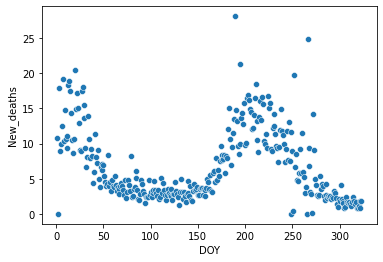

In [21]:
# lets see how scatter plot of the two looks
sns.scatterplot(data=df2,x='DOY',y='New_deaths')
plt.show()

In [22]:
# Linear regression (which model have you used? it's okay! ) model training
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(y_test,y_pred))

33.5841121863466
4.736142966416388


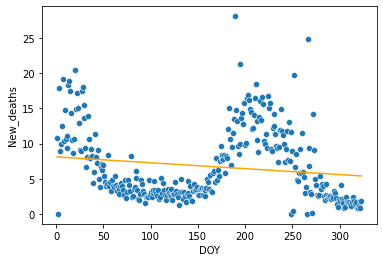

In [23]:
# lets visualize the model with data.
t = df2[['DOY']].values
y_preda=model.predict(x)
sns.scatterplot(data=df2,x='DOY',y='New_deaths')
plt.plot(t,y_preda,'orange')
plt.show()

   ### which model have you used? it's okay

## Question 2 

Cardio-vascular diseases are among the most frequent causes of death. Clinically there are
widely accepted indicators for potential risk of contracting a cardio-vascular sickness. Hence,
the knowledge of the determinant risk factors that lead cardio-vascular sickness can aid decision-
making for pretreatment and changing lifestyles to avoid or reduce future complications.

The dataset SAHeart.csv is about coronary heart disease (CHD) in South Africa. The goal is
to use a set of indicators to identify if a patient has a risk of contracting coronary diseases or
not. This predictor variables are:

1. x1 =sbp: systolic blood pressure
2. x2 =tobacco: cumulative tobacco (kg)
3. x3 =ldl: low densiity lipoprotein cholesterol level
4. x4 =adiposity: sever overweight
5. x5 = famhist: family history of heart disease (Present, Absent)
6. x6 =typea: type-A behavior

7. x7 =obesity: excessive fat accumulation
8. x8 =alcohol: current alcohol consumption
9. x9 =age: age at onset
10. y =chd: response, coronary heart disease

### (a) Upload this data set and replace non-number data with a reasonable numerical representation

In [24]:
# libraries specific to this question
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

# loading the dataset
saheart = pd.read_csv('SAheart.data')

In [25]:
# replace [present, absent] to [1, 0]
lb_make = LabelEncoder()
saheart['famhist'] = lb_make.fit_transform(saheart["famhist"])
saheart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


### (b) Train a logistic regressor to tell if a patient has high risk of CHD or not.


In [26]:
x = saheart[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity','alcohol', 'age']].values
y = saheart[['chd']].values

# Fitting Logistic Regression to the Training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


In [27]:
# you can check confusion matrix and accuracy
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
print(accuracy_score(y_pred, y_test))

[[68  9]
 [23 16]]
0.7241379310344828


### (c) Identify if the a patient with the following data is of high risk or not x = [133, 3.3, 4.6, 34.5, present, 52, 30, 32, 20, 44].

In [28]:
# we replaced present with 1, and ignored the last input (what's have you ignored? it's okay!)
x1 = [[133, 3.3, 4.6, 34.5, 1 , 52, 30, 32, 20]]
y_pred1 = classifier.predict(x1)
y_pred1

array([0])

###### Not high risk!

### (d) Which are the most determinant factors for heart disease?


In [29]:
# lets check their coefficients
saheart.corr()
print(classifier.coef_, classifier.intercept_)

[[-0.01256788  0.09978533  0.10758389  0.06808124  0.67593737  0.02501265
  -0.16349753 -0.00171405  0.03143667]] [-0.29735211]


###### From the coefficients of the model, you can identify one that is the most determinant factor ===> the one with the highest coefficient. Here is the famhist (0.676).

(e) Does having a family history of coronary heart disease affect a patients chance of having
coronary heart disease?

Hint: Use sklearn, pandas, numpy